# Part-A 

DOMAIN: Telecom

• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.

• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:


    • Customers who left within the last month – the column is called Churn
    • Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
    streaming TV and movies
    • Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    • Demographic info about customers – gender, age range, and if they have partners and dependents


• PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the
company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

 1. Data Understanding & Exploration:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import warnings; warnings.filterwarnings('ignore')

In [2]:
#A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable
Dataset1=pd.read_csv("TelcomCustomer-Churn_1.csv")
print("Shape of dataset 1",Dataset1.shape)
Dataset1.head()

Shape of dataset 1 (7043, 10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [3]:
#B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.
Dataset2=pd.read_csv("TelcomCustomer-Churn_2.csv")
print("Shape of dataset 2",Dataset2.shape)
Dataset2.head()

Shape of dataset 2 (7043, 12)


,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame
TeleDf=Dataset1.merge(Dataset2,left_on='customerID',right_on='customerID')
print("shape of combined DF " , TeleDf.shape)
print("\n",TeleDf.dtypes,"\n")
TeleDf.head()

shape of combined DF  (7043, 21)

 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object 



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.
columnmissing="No"
for column in Dataset1.columns.union( Dataset2.columns): #for every columns of dataset1 and dataset2
    if(column not in TeleDf.columns): #check whether columns not available in merged DF
        print("column [",column,"] missing") 
        columnmissing="Yes"    #make flag yes if column missing

if(columnmissing =="No"):  #validate the flag and print relevant message
    print("No column Missing")

No column Missing


2. Data Cleaning & Analysis:

In [6]:
#A.Impute missing/unexpected values in the DataFrame.
#missing vaues
print(TeleDf.isna().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<b>No Missing values</b>

In [7]:
#finding unexpected values
missing_values = ["n/a", "na", "--", " ","?","-"]
for feature in TeleDf.columns:
    print(feature ,pd.unique(TeleDf[feature]),"\n")
    if (not TeleDf[TeleDf[feature].isin(missing_values)].empty):
        print("Unexpected value found in",feature,"column in the indices ", TeleDf[TeleDf[feature].isin(missing_values)].index)
    else:
        print("No unexpected values")
    print("----------------------------------")

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

No unexpected values
----------------------------------
gender ['Female' 'Male'] 

No unexpected values
----------------------------------
SeniorCitizen [0 1] 

No unexpected values
----------------------------------
Partner ['Yes' 'No'] 

No unexpected values
----------------------------------
Dependents ['No' 'Yes'] 

No unexpected values
----------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

No unexpected values
----------------------------------
PhoneService ['No' 'Yes'] 

No unexpected values
----------------------------------
MultipleLines ['No phone service' 'No' 'Yes'] 

No unexpected values
----------------------------------
InternetService ['DSL' 'Fiber optic' 'No'] 

No

Unexpected column found in Totalcharges

In [8]:
#examinig Totalcharges feature
TeleDf[TeleDf['TotalCharges'].isin(missing_values)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


<b>Actions </b>

1.  In MultipleLines , convert 'No phone service' to 'No'
2. OnlineSecurity ,OnlineBackup ,DeviceProtection ,TechSupport, StreamingTV and StreamingMovies --> convert 'No internet service' to 'No'
3. In total charges are empty for 11 rows, replace with 0



In [9]:
TeleDf['MultipleLines']=TeleDf['MultipleLines'].replace('No phone service', 'No')
TeleDf['OnlineSecurity']=TeleDf['OnlineSecurity'].replace('No internet service', 'No')
TeleDf['OnlineBackup']=TeleDf['OnlineBackup'].replace('No internet service', 'No')
TeleDf['DeviceProtection']=TeleDf['DeviceProtection'].replace('No internet service', 'No')
TeleDf['TechSupport']=TeleDf['TechSupport'].replace('No internet service', 'No')
TeleDf['StreamingTV']=TeleDf['StreamingTV'].replace('No internet service', 'No')
TeleDf['StreamingMovies']=TeleDf['StreamingMovies'].replace('No internet service', 'No')
TeleDf['TotalCharges']=TeleDf['TotalCharges'].replace(' ',0)

In [10]:
#B. Make sure all the variables with continuous values are of ‘Float’ type
TeleDf.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#converting  TotalCharges, a continuous value to float
TeleDf['TotalCharges']=pd.to_numeric(TeleDf['TotalCharges'])

#converting categorical columns
cat_columns =TeleDf.select_dtypes(include=['object']).columns
for c in cat_columns:
    if(c !='customerID'):
        TeleDf[c]=TeleDf[c].astype('category')
TeleDf['SeniorCitizen']=TeleDf['SeniorCitizen'].astype('category')
TeleDf.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [12]:
#C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

def Piechart_categorical(Df):
    cat_columns =Df.select_dtypes(include=['category']).columns  #Filtering only categorical columns
    rows=int(np.ceil(len(cat_columns)/3)) #based on column length calculating how many rows of subplots to be created
    fig, axes = plt.subplots(rows, 3, figsize=(15,rows*5)) # subplots with 3 column fixed and rows were calculated above
    i=0
    for c in cat_columns:     #for every categorical calumn , finding the axes and plotting distribution
        ax = axes[i // 3, i % 3]
        value=Df[c].value_counts()
        labels=Df[c].unique().tolist()
        ax.pie(value,labels=labels,autopct='%1.1f%%')
        ax.set_title(c)
        i=i+1
#fig.subplots_adjust(wspace=.1)


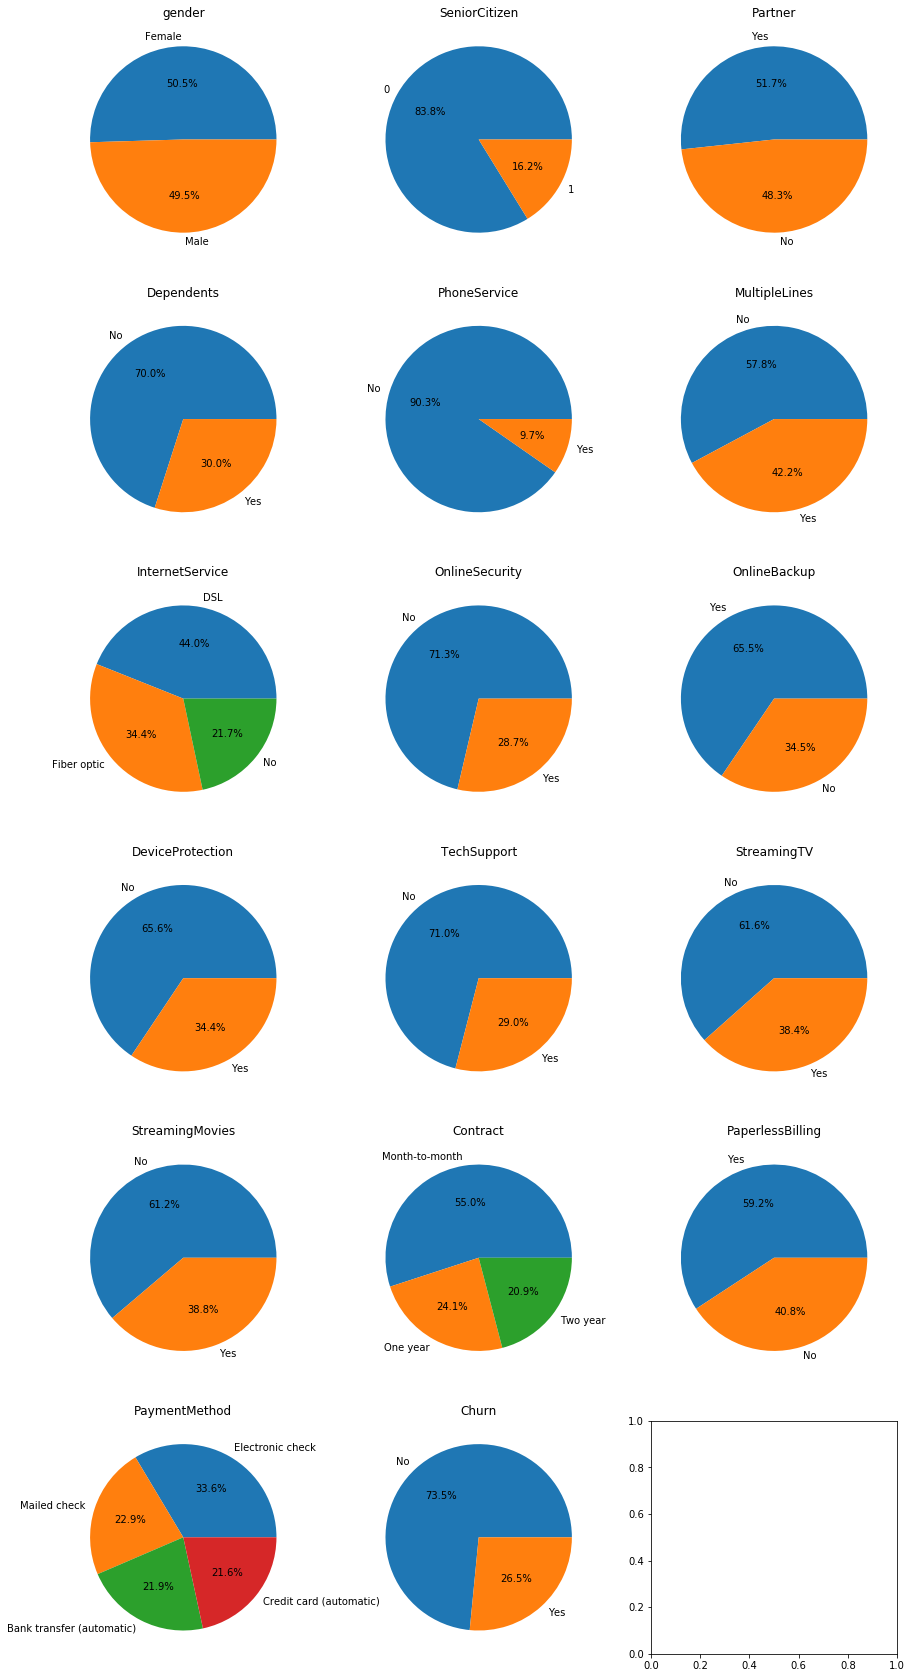

In [13]:
Piechart_categorical(TeleDf)  #pass any df to function to get pie chart for categorical feature alone

#D. Share insights for Q2.c

1. There is no major variation in Gender distribution of customers (.5% alone varies)
2. Among the dataset ,Approximately half of them are partners (51.7%) and 70% of the customers are non-dependents.
3. only 9.7% of the customers opted for phone service and 42.2% of the customer have multiple lines
4. 60-70% of the customers dont have online security, device protection , tech supprot , streaming TV and Streaming movies
5. 65.5% of customers have online backup
6. DSL internet service(44.4%) preferred more compared to fiber(34.4%)
7. 55% of the people have monthly contract where as one year and two year contracts are 24.1% and 20.9% respetively
8. 59.2% of them had paperless billing ; payment with electronic check 33.6 and Mailcheck,bank transfer and credit cards are 21- 22% each
9. 26.5% of the customer churn

In [14]:
TeleDf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#E. Encode all the appropriate Categorical features with the best suitable approach
replaceStruct = {
                "gender":{"Male": 0, "Female": 1 },
                "Partner":{"No": 0, "Yes": 1 },
                "Dependents": {"No": 0, "Yes": 1 },
                "PhoneService":{"No": 0, "Yes": 1 },
                "MultipleLines":{"No": 0, "Yes": 1},
                "OnlineSecurity":{"No": 0, "Yes": 1 },
                "OnlineBackup":{"No": 0, "Yes": 1 },
                "DeviceProtection":{"No": 0, "Yes": 1 },
                "TechSupport":{"No": 0, "Yes": 1 },
                 "StreamingTV":{"No": 0, "Yes": 1 },
                 "StreamingMovies":{"No": 0, "Yes": 1 },
                 "PaperlessBilling":{"No": 0, "Yes": 1 },
                 "Churn":{"No": 0, "Yes": 1 }
               # "InternetService":{"No":0,"DSL":1,"Fiber optic":2},
                #"Contract":{"Month-to-month":0,"One year":1,"Two year":2},
                #"PaymentMethod":{"Electronic check":0,"Mailed check":1,"Bank transfer (automatic)":2,"Credit card (automatic)":3}
                    }
oneHotCols=["InternetService","Contract","PaymentMethod"]

TeleDf=TeleDf.replace(replaceStruct)
TeleDf=pd.get_dummies(TeleDf, columns=oneHotCols)
TeleDf.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [16]:
#drop customerid
TeleDf1=TeleDf.drop("customerID" , axis=1)
x=TeleDf1.drop("Churn" , axis=1)
y = TeleDf1['Churn']


In [17]:
#F. Split the data into 80% train and 20% test.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.20, random_state=65)

In [18]:
#G. Normalize/Standardize the data with the best suitable approach
scale= preprocessing.MinMaxScaler()
scaled_data = scale.fit_transform(x)

 3. Model building and Improvement:

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data ,y, test_size=.20, random_state=7)

Training score:  0.8351082712105077
Testing score:  0.7984386089425124

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1021
           1       0.67      0.52      0.59       388

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[923  98]
 [186 202]]


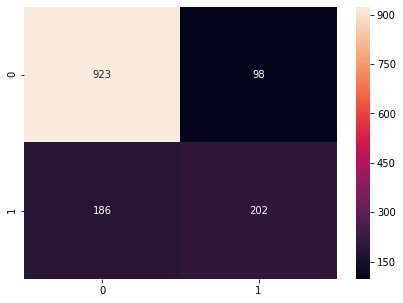


Accuracy Score:
 0.798


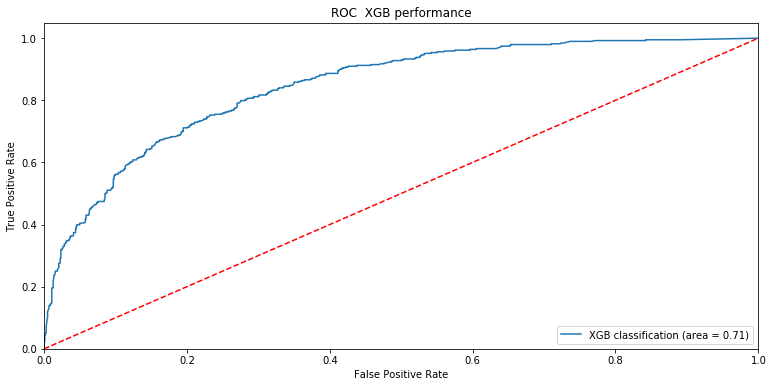

In [20]:
#A. Train a model using XGBoost. Also print best performing parameters along with train and test performance

model = XGBClassifier(n_estimators=10, random_state=7)
model.fit(X_train,Y_train)


y_true, y_pred = Y_test, model.predict(X_test)

#Training and testing scores
print("Training score: ",model.score(X_train,Y_train))
print("Testing score: ",model.score(X_test,Y_test))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred,labels=[0,1])
print('\nConfusion Matrix:\n', cm)


df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],columns = [i for i in [0,1]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

XGB_roc_auc = roc_auc_score(y_true, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'XGB classification (area = {})'.\
         format(XGB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC  XGB performance')
plt.legend(loc = 'lower right')
plt.show()

In [21]:
#B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance
param_grid = {
 'max_depth':range(3,21,3),
 'min_child_weight':range(2,6,2),
'gamma':[1]
}
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.1,0.3],
          'min_child_weight':range(2,6,2),
           'n_estimators': [100, 500],
           'colsample_bytree': [0.3, 0.7],
         'gamma':[0,1]}

grid = GridSearchCV(XGBClassifier(), params ,verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, Y_train)



Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100;, score=0.798 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100;, score=0.776 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100;, score=0.820 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100;, score=0.807 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100;, score=0.800 total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=500;, score=0.783 total time=   1.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1,

[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=0.773 total time=   2.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=0.791 total time=   2.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=0.785 total time=   2.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=0.777 total time=   2.7s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=100;, score=0.798 total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=100;, score=0.776 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=100;, score

[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.789 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.782 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=500;, score=0.761 total time=   2.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=500;, score=0.760 total time=   2.7s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=500;, score=0.793 total time=   2.0s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=500;, score=0.779 total time=   2.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=500;, sc

[CV 1/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.789 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.777 total time=   0.5s
[CV 3/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.807 total time=   0.6s
[CV 4/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.799 total time=   0.7s
[CV 5/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.793 total time=   0.5s
[CV 1/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=0.785 total time=   2.8s
[CV 2/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, sc

[CV 3/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.799 total time=   2.8s
[CV 4/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.779 total time=   2.7s
[CV 5/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.768 total time=   2.9s
[CV 1/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.772 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.767 total time=   0.6s
[CV 3/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=100;, score=0.801 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=4, n_estimators=100;, sc

[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100;, score=0.791 total time=   1.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.770 total time=   6.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.770 total time=   9.8s
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.795 total time=   4.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.776 total time=   4.4s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.771 total time=   4.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=100;, sc

[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=100;, score=0.763 total time=   0.9s
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=100;, score=0.782 total time=   0.8s
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=100;, score=0.777 total time=   0.8s
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=100;, score=0.779 total time=   0.9s
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.754 total time=   4.7s
[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=500;, score=0.765 total time=   3.8s
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=500;, sc

[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=500;, score=0.802 total time=   2.6s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=500;, score=0.794 total time=   2.4s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=500;, score=0.782 total time=   2.8s
[CV 1/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100;, score=0.793 total time=   0.8s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100;, score=0.780 total time=   0.9s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100;, score=0.796 total time=   0.9s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100;, score

[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=100;, score=0.785 total time=   0.6s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=100;, score=0.787 total time=   0.6s
[CV 1/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=500;, score=0.779 total time=   3.2s
[CV 2/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=500;, score=0.767 total time=   3.4s
[CV 3/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=500;, score=0.793 total time=   2.7s
[CV 4/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=500;, score=0.789 total time=   2.7s
[CV 5/5] END colsample_bytree=0.7, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=4, n_estimators=500;, score=0.7

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     n

In [22]:
print("Best parameters", grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\nBest Estimator",grid.best_estimator_)
print("\n Best Score" ,grid.best_score_)

Best parameters {'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100}

Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 Best Score 0.8008518505092977


# Final Best Model:
    


Training score:  0.8161164359247426
Testing score:  0.8147622427253371

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1021
           1       0.71      0.55      0.62       388

    accuracy                           0.81      1409
   macro avg       0.78      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409


Confusion Matrix:
 [[935  86]
 [175 213]]


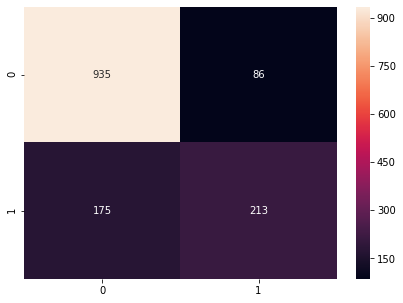


Accuracy Score:
 0.815


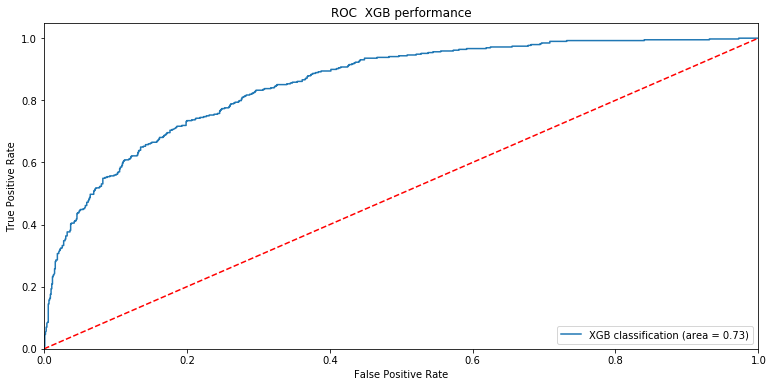

In [23]:
bestparam={'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100}

model = XGBClassifier(**bestparam)
model.fit(X_train,Y_train)


y_true, y_pred = Y_test, model.predict(X_test)

#Training and testing scores
print("Training score: ",model.score(X_train,Y_train))
print("Testing score: ",model.score(X_test,Y_test))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred,labels=[0,1])
print('\nConfusion Matrix:\n', cm)


df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],columns = [i for i in [0,1]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

XGB_roc_auc = roc_auc_score(y_true, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'XGB classification (area = {})'.\
         format(XGB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC  XGB performance')
plt.legend(loc = 'lower right')
plt.show()

| Modeling technique | Train Accuracy | Test Accuracy | class 0 [No churn] - Precision ,recall,score | Class 1 [Churn] - Precision ,recall,score  | Improvement Remarks |
| --- | --- | --- | --- | --- | :-- |
| Base Model | 83.5% | 79.8% | 83%,90%,87% | 67%,52%,59% |
|Hyper Parameter Tuned<br> <br>best parameters<br> {'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100}|81.6%|81.4%|84%,92%,88%|71%,55%,62%| +2% improvement in test accuracy <br><br>for class 0 ,<br>precision : +1%,<br>recall: +2%and<br> score +1% improved<br> <br>For class 1 ,<br> precision : +4%,<br>recall: +3%and<br> score +3% improved |


# Part-B

• DOMAIN: IT
    
• CONTEXT: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts
involved in building workflows for each dataset.

• PROJECT OBJECTIVE: Build a machine learning workflow that will run autonomously with the csv file and return best performing model.

• STEPS AND TASK [30 Marks]:
    
    1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions.  You can use Dataset from Part 1 (single/merged).
    2. Create separate functions for various purposes.
    3. Various base models should be trained to select the best performing model.
    4. Pickle file should be saved for the best performing model.


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
import pickle

In [25]:
def load_dataset(filename):
    df = pd.read_csv(filename)
    #df=Dataset1.merge(Dataset2,left_on='customerID',right_on='customerID')
    print("DATA loaded",df.shape)
    return df

In [26]:
class Datacleaning:
    def __init__(self,df,unwantedcolumn):
        self.dropduplicates()
        self.dropunwantedcolumns(unwantedcolumn)
        self.check_missingvalues(df)
        self.datatype_conversion()
        
    #remove duplicates in dataset 
    def dropduplicates(self): 
        print("Dropping duplicates - <If applies> ")
        df.drop_duplicates(keep='first', inplace=True)
        
    
    #Drop unwanted columns in dataset
    def dropunwantedcolumns(self,column): 
        if (column != ''):
            df.drop(column, axis=1,inplace=True)
            print("Dropped unwanted column -",column)
    
    
    #Checks for missing value and unexpected values and impute with relevant data
    def check_missingvalues(self,dataframe): 
        print("\n-------Checking Missing and unexpected values------\n")
        missingvalue = False
        unexpected_values = ["n/a", "na", "--", " ","?","-","@","#","n-a"]

        for feature in dataframe.columns:
             #check for NaN values 
            if(dataframe[feature].isnull().sum()!=0 or dataframe[feature].isna().sum()!=0 ):
                print("Data missing in column", feature)
                #call impute func to replace null vales
                self.impute(feature)  
                missingvalue= True
                
            #check for unexpected values like special characters.     
            if (not dataframe[dataframe[feature].isin(unexpected_values)].empty):  
                print("Unexpected value found in",feature,"column in the indices ", dataframe[dataframe[feature].isin(unexpected_values)].index)
                #changing unexpected values to NaN
                df.replace(unexpected_values,np.nan, inplace=True)  
                #call impute func to replace null values
                self.impute(feature) 

        if(not missingvalue):
            print("No missing value in dataframe")

            
    
    #imputing missing value with mode for categorical and mean for numerical
    def impute(self,feature):
        print("\n------Imputing Missing and unexpected values------\n ")
        #for categorical , replacing with most frequent occurrence
        if (df[feature].dtypes =="object"):
            df[feature].fillna(df[feature].mode()[0], inplace=True)
            print("Imputed column",df[feature].dtypes ,feature,"with mode",df[feature].mode()[0])
        
        #For numerical replace with mean 
        else:
            df[feature].fillna(df[feature].mean(), inplace=True)
            print("Imputed column" ,feature,"with Mean")
        print("\n ")
    
    
    #trying to convert feature to float if it is possible ; for strings it will raise exception and we we will not change that feature types
    def datatype_conversion(self):
        print(" \n------Data Type conversion ------\n")
        for feature in df.columns:
            try:
                df[feature]=pd.to_numeric(df[feature])
                df[feature]=df[feature].astype('float64')
                print("Converted to float64 -", feature)
            except:
                continue
    
    
    #Outlier detection for features
    def outlierdetection(self):    
        print(" \n------ Outlier Detection ------\n")
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        print(IQR)
        outliers=np.where((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
        if (len(outliers[0])==0):
            print("No Outliers Found")
        else:
            print(outliers)
            #self.outliertreatment(Q1,Q3,IQR)


    #Outlier treatment 
    def outliertreatment(self,Q1,Q3,IQR):
        # Replace every outlier on the lower side by the lower whisker
        for i, j in zip(np.where(df < Q1 - 1.5 * IQR)[0], np.where(df < Q1 - 1.5 * IQR)[1]): 
            whisker  = Q1 - 1.5 * IQR
            df.iloc[i,j] = whisker[j]


        #Replace every outlier on the upper side by the upper whisker    
        for i, j in zip(np.where(df > Q3 + 1.5 * IQR)[0], np.where(df > Q3 + 1.5 * IQR)[1]):
            whisker  = Q3 + 1.5 * IQR
            df.iloc[i,j] = whisker[j]
            

In [27]:
class Datapreprocessing:        
        
    def categorical_encoding(self,ordinal,oneHotCols,df):
        print(" \n--------Categorical Encoding------\n")
        #label encoding the ordinal features
        for feature in ordinal:
            label_encoder_x= LabelEncoder()  
            df[feature]= label_encoder_x.fit_transform(df[feature]) 
        print("label encoded",ordinal)
        #one-hot encoder for other categorical columns
        df=pd.get_dummies(df, columns=oneHotCols)
        print("One Hot encoded",oneHotCols)
        return df
    
    def featurescaling(self,x):
        #feature scaling with minmaxscaler 
        print("\n------ Feature Scaling ------\n")
        scaler = preprocessing.MinMaxScaler()
        Xscaled= scaler.fit_transform(x)  
        print("Scaling done with MinMax Scaler")
        return Xscaled
    
    def Train_test_split(self,x,y,testratio,seed):
        print("\n------ Train test split ------\n")
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=testratio, random_state=seed)
        return X_train, X_test, Y_train, Y_test
    
    
    def balancingtarget(self,X_train,Y_train):
        print("\n------ Balancing the data with SMOTE ------\n")
        sm = SMOTE(random_state = 40, sampling_strategy='all')
        X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

        # Before oversampling
        unique, counts = np.unique(Y_train, return_counts = True)
        print("Before Sampling\n",np.asarray((unique, counts)).T)

        # After oversampling
        unique, counts = np.unique(Y_train_res, return_counts = True)
        print("After Sampling\n",np.asarray((unique, counts)).T)
        return X_train_res,Y_train_res
    

In [28]:
class BaseModeltraning:
    
        
        
    def GetBasedModel(self):
        print("\n\n------ Defining 9 base Models------\n")
        #making a tuple ist with model name and function
        basedModels = []
        basedModels.append(('LR'   , LogisticRegression()))
        basedModels.append(('KNN'  , KNeighborsClassifier()))
        basedModels.append(('NB'   , GaussianNB()))
        basedModels.append(('SVM'  , SVC()))
        basedModels.append(('CART' , DecisionTreeClassifier()))
        basedModels.append(('AB'   , AdaBoostClassifier()))
        basedModels.append(('GBM'  , GradientBoostingClassifier()))
        basedModels.append(('RF'   , RandomForestClassifier()))    
        basedModels.append(('XGB'   , XGBClassifier()))
        print(basedModels)
        print("\n\n")
        return basedModels

    def Modelvalidation(self,X_train, y_train,models,seed):
        print("\n------ Model validation ------\n")
        # Test options and evaluation metric
        num_folds = 10
        scoring = 'accuracy'

        results = []
        names = []
        for name, model in models:
            kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
            cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f" % (name, cv_results.mean())
            print(msg)

        return names, results,


    def scoringtable(self,modelset,cvresult):
        print("\n\n------ Base Model Scoring Table ------\n\n")
        scores=[]
        models=[]
        names=[]
        for r in cvresult:
            scores.append(round(r.mean()*100,2))
        for name,model in modelset:
            models.append(model)
            names.append(name)
        scoringtable = pd.DataFrame({'Modelname':names,'Model':models ,'Score': scores})
        return scoringtable


In [29]:
class ModelBoosting:
    
    def GethyperModel(self):
        print("\n\n------ Defining Hyper parameters for Algo tuning Models------\n\n")
        #making a tuple ist with model name, function and param_grid
        hyperModels = []
        param={"penalty" : ['l1', 'l2']}
        hyperModels.append(('LR-Tune'   , LogisticRegression(),{"penalty" : ['l1', 'l2']}))
        hyperModels.append(('KNN-Tune'  , KNeighborsClassifier(),{"n_neighbors":range(1,20,2)}))
        hyperModels.append(('NB-Tune'  , GaussianNB(),{'var_smoothing': np.logspace(0,-9, num=100)}))
        hyperModels.append(('SVM-Tune'  , SVC(),{"C":[0.1, 0.5],"kernel":[ 'rbf' , 'sigmoid' ]}))
        hyperModels.append(('CART-Tune' , DecisionTreeClassifier(),{"max_depth":range(3,6,2),"min_samples_leaf":range(2,6,2),"criterion":["gini", "entropy"]}))
        hyperModels.append(('AB-Tune'   , AdaBoostClassifier(),{"learning_rate":[0.3,0.1],"n_estimators":[100,500]}))
        hyperModels.append(('GBM-Tune'  , GradientBoostingClassifier(),{"learning_rate":[0.3,0.1],"n_estimators":[100,500]})) 
        hyperModels.append(('RF-Tune'  , RandomForestClassifier(),{ 'max_depth': [3,7,10],'min_samples_leaf': [4, 6],'min_samples_split': [2, 4, 6], 'n_estimators': [100, 200]}))         
        hyperModels.append(('XGB-Tune'   , XGBClassifier(),{"colsample_bytree":[0.8],"min_child_weight":[3],"learning_rate":[0.3,0.1],"n_estimators":[10,100],"max_depth":range(3,6,2)}))
        print(hyperModels)
        print("\n\n")
        return hyperModels

    def hypermodelvalidation(self,X_train, Y_train,models):
        print("\n\n------ Cross validation for Algo tuning Models------\n")
        # Test options and evaluation metric
        cv = 10
        scoring = 'accuracy'

        results = []
        names = []
        for name, model,hyperparameters in models:
            gcv = GridSearchCV(model,hyperparameters,cv=cv,verbose=3,n_jobs=-1,)
            best_model = gcv.fit(X_train, Y_train)
            message = (model,best_model.best_score_, best_model.best_params_)
            print("%s -Best: %f using %s" % (message))
            print("\n")
            names.append(name)
            results.append(message)
        return names,results

    def tunescoringtable(self,models,names,cvresult):
        print("\n\n--------- Scoring table for Algo tuning Models----------\n\n")
        scores=[]
        models=[]
        bestparam=[]
        for model,r,param in cvresult:
            scores.append(round(r*100,2))
            models.append(model)
            bestparam.append((param))
        scoringtable = pd.DataFrame({'Modelname':names,'Model':models ,'Score': scores,'bestParam':bestparam})
        return scoringtable




In [30]:
 class IdentifyFinalModel:
    def GetBestModel(self,cvresults):
        print("\n\n------ Models with best parameters------\n")
        BestModels = []
        #cvresults[i][2] have the best parameters identified from previous hypertuning 
        lrparam=cvresults[0][2]
        BestModels.append(('bestLR'   , LogisticRegression(**lrparam)))
        knnparam=cvresults[1][2]
        BestModels.append(('bestKNN'  , KNeighborsClassifier(**knnparam)))
        nbparam=cvresults[2][2]
        BestModels.append(('bestNB'  , GaussianNB(**nbparam)))
        svcparam=cvresults[3][2]
        BestModels.append(('bestSVM'  , SVC(**svcparam)))
        dtparam=cvresults[4][2]
        BestModels.append(('bestCART' , DecisionTreeClassifier(**dtparam)))
        abparam=cvresults[5][2]
        BestModels.append(('bestAB'   , AdaBoostClassifier(**abparam)))
        gbparam=cvresults[6][2]
        BestModels.append(('bestGBM'  , GradientBoostingClassifier(**gbparam)))  
        rfparam=cvresults[7][2]
        BestModels.append(('bestRF'  , RandomForestClassifier(**rfparam)))  
        xgparam=cvresults[8][2]
        BestModels.append(('bestXGB'   , XGBClassifier(**xgparam)))
        print(BestModels)
        print("\n\n")
        return BestModels
    
    def ensemblingBestModels(self,estimators,X_train,Y_train,X_test,Y_test):
        print("\n\n------ Voting classifier for top3 Best models with best parameters------\n")
        kfold = StratifiedKFold(n_splits=10)
        ensemble = VotingClassifier(estimators)
        results = cross_val_score(ensemble, X_train,Y_train, cv=kfold)
        print("\n\n------ Final Model Score ------\n")
        print('Accuracy on train: ',results.mean())
        ensemble_model = ensemble.fit(X_train,Y_train)
        pred = ensemble_model.predict(X_test)
        print('Accuracy on test:' , (Y_test == pred).mean())
        return ensemble

        
    def packthemodel(self,ensemble):
        print("\n\n------ Save the pickle file ------\n")
        return pickle.dumps(ensemble)
    
    def Evaluationmetrics(self,Finalmodel,X_train,Y_train,X_test,Y_test):
        fmodel = Finalmodel
        fmodel.fit(X_train,Y_train)
        y_true, y_pred = Y_test, fmodel.predict(X_test)

        #Training and testing scores
        print("Training score: ",fmodel.score(X_train,Y_train))
        print("Testing score: ",fmodel.score(X_test,Y_test))

        # Classification Report
        print('\n{}'.format(classification_report(y_true, y_pred)))

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred,labels=[0,1])
        print('\nConfusion Matrix:\n', cm)


        df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],columns = [i for i in [0,1]])
        plt.figure(figsize = (7,5))
        sns.heatmap(df_cm, annot=True ,fmt='g')
        plt.show()
        return fmodel




***********DATA LOADING***********

DATA loaded (7043, 21)


***********DATA CLEANING***********

Dropping duplicates - <If applies> 
Dropped unwanted column - customerID

-------Checking Missing and unexpected values------

Unexpected value found in TotalCharges column in the indices  Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

------Imputing Missing and unexpected values------
 
Imputed column object TotalCharges with mode 20.2

 
No missing value in dataframe
 
------Data Type conversion ------

Converted to float64 - SeniorCitizen
Converted to float64 - tenure
Converted to float64 - MonthlyCharges
Converted to float64 - TotalCharges


***********DATA Preprocessing***********

 
--------Categorical Encoding------

label encoded ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', '

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) -Best: 0.850602 using {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}




--------- Scoring table for Algo tuning Models----------


   Modelname                                              Model  S

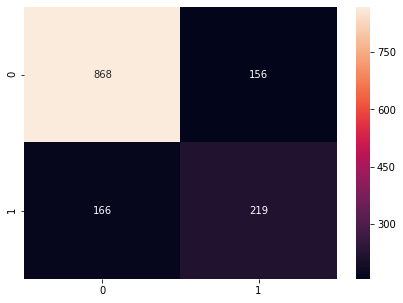



------ Save the pickle file ------

Pickle File saved


***********Testing pickle file***********

input:  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.38888889e-01 1.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 7.70149254e-01 5.36048927e-01
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  4.16666667e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 3.15920398e-01 1.68024463e-01
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.38888889e-02 1.

In [31]:
 def main():
    global df
    print("\n***********DATA LOADING***********\n")
    df=load_dataset("TelcomCustomer-merged.csv")
    
    print("\n\n***********DATA CLEANING***********\n")
    unwantedfeature='customerID'
    Dclean=Datacleaning(df,unwantedfeature)
    
    #eencoding ordinal and categorical columns
    ordinal=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    oneHotCols=["InternetService","Contract","PaymentMethod"]
    
    print("\n\n***********DATA Preprocessing***********\n")
    Dprocessing=Datapreprocessing()
    encodedDF=Dprocessing.categorical_encoding(ordinal,oneHotCols,df)
    
    #define the input variables and target
    testratio=0.20
    seed=47
    inputvar= encodedDF.drop("Churn", axis=1)
    target=encodedDF['Churn']
    #scaling the inputs
    scaledinput=Dprocessing.featurescaling(inputvar)
    
    #split train and test data after scaling
    X_train, X_test, Y_train, Y_test=Dprocessing.Train_test_split(scaledinput, target, testratio ,seed)
    print("Xtrain shape :",X_train.shape)
    print("Xtest shape :",X_test.shape)
    print("Ytrain shape :",Y_train.shape)
    print("Ytest shape :",Y_test.shape)
    
    #resampling train data for balancing the data for target
    X_trainres,Y_trainres=Dprocessing.balancingtarget(X_train,Y_train)
    
    print("\n\n***********Model Building***********\n")
    #get the defind models
    Basemodel=BaseModeltraning()
    bmodels = Basemodel.GetBasedModel()
    #get cross validation result of base models
    bmnames,bmcvresults = Basemodel.Modelvalidation(X_trainres, Y_trainres,bmodels,seed)
    #Formating the results
    basemodelscore=Basemodel.scoringtable(bmodels,bmcvresults)
    print(basemodelscore)
    
    print("\n\n***********Tuning the Model ***********\n")
    #define parameters and models for Algo tning
    Tunedmodel=ModelBoosting()
    ptmodels = Tunedmodel.GethyperModel()
    #get the CVresults
    ptnames,ptcvresults = Tunedmodel.hypermodelvalidation(X_trainres, Y_trainres,ptmodels)
    #Formating the results
    hypertuningscore=Tunedmodel.tunescoringtable(ptmodels,ptnames,ptcvresults)
    print(hypertuningscore)

    print("\n\n***********Models with Best Parameters tuned***********\n")
    #creating object for the class
    ensmblmodel=IdentifyFinalModel()
    FBmodel=BaseModeltraning()
    #defining the models with best parameters identified in tuning models
    bestmodels = ensmblmodel.GetBestModel(ptcvresults)
    #getting the ensmodel score for models wth best parameters
    bestnames,bestcvresults = FBmodel.Modelvalidation(X_trainres, Y_trainres,bestmodels,seed)
    #Formating the result
    bestparamtunedscore=FBmodel.scoringtable(bestmodels,bestcvresults)
    print(bestparamtunedscore)
    
    print("\n\n***********Top 3 best models***********\n")
    #top3 models of above
    top3bestmodel=pd.concat([basemodelscore,hypertuningscore]).sort_values(['Score'] , ascending=False).head(3)
    print(top3bestmodel)
     
    #defining estimators as top3 models for voting classifier
    estimators=[]
    for index,rows in top3bestmodel.iterrows():
        estimators.append((rows['Modelname'],rows['Model']))
    
    print("\n\n***********Ensembling technique***********\n")
    #Voting classifier model building
    FinalModel=ensmblmodel.ensemblingBestModels(estimators,X_trainres,Y_trainres,X_test,Y_test)
    
    
    print("\n\n***********Evaluating final model***********\n")
    BestFModel=ensmblmodel.Evaluationmetrics(FinalModel,X_trainres,Y_trainres,X_test,Y_test)
 
    
  
    #save the pickel file
    picklefile=ensmblmodel.packthemodel(BestFModel)
    print("Pickle File saved")
    
    
    print("\n\n***********Testing pickle file***********\n")
    Deployedmodel = pickle.loads(picklefile)
    print("input: ",X_train[:9])
    print("Prediction Result :", Deployedmodel.predict(X_train[:9]))
    


if __name__ == "__main__":
    main()